<a href="https://colab.research.google.com/github/oprostep/2023-fall_LP/blob/main/GAN_Smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 웃는 얼굴 만들기
## Dataset은 아래 주소 Smiling or Not | Face Data 에서 퍼었음.
### https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
pwd

'/content'

In [3]:
cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


Text(0.5, 1.0, 'Non_Smile')

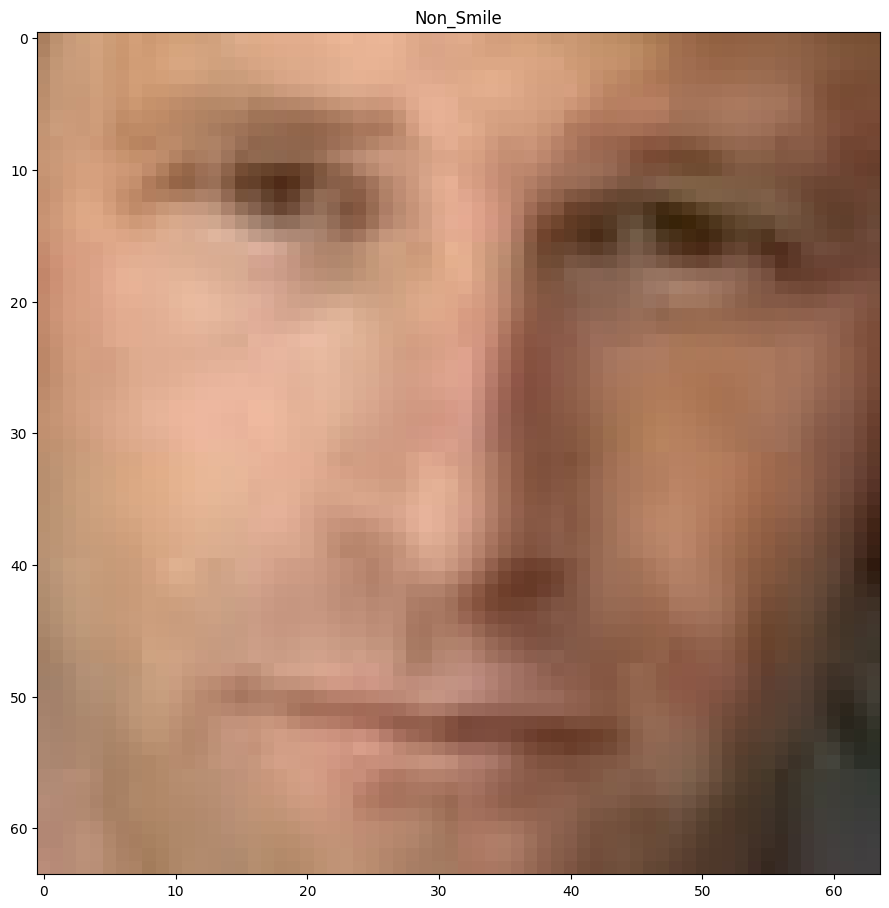

In [4]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_Smile')

In [5]:
image_sample.shape

(64, 64, 3)

In [6]:
pwd


'/content/drive/MyDrive/archive'

In [7]:
cd ..

/content/drive/MyDrive


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='archive',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째



Found 603 images belonging to 1 classes.


array([[[0.28627452, 0.17254902, 0.10980393],
        [0.3019608 , 0.18823531, 0.1254902 ],
        [0.32941177, 0.20000002, 0.13333334],
        ...,
        [0.5411765 , 0.3372549 , 0.19215688],
        [0.5019608 , 0.2784314 , 0.16078432],
        [0.45098042, 0.227451  , 0.10980393]],

       [[0.2627451 , 0.14901961, 0.08627451],
        [0.28235295, 0.16862746, 0.10588236],
        [0.30980393, 0.18823531, 0.11764707],
        ...,
        [0.5647059 , 0.36078432, 0.21568629],
        [0.50980395, 0.29803923, 0.16470589],
        [0.4431373 , 0.21960786, 0.10196079]],

       [[0.23529413, 0.12941177, 0.0627451 ],
        [0.25882354, 0.14509805, 0.08235294],
        [0.28627452, 0.16470589, 0.09411766],
        ...,
        [0.6       , 0.39607847, 0.2509804 ],
        [0.53333336, 0.32156864, 0.18823531],
        [0.43921572, 0.227451  , 0.09411766]],

       ...,

       [[0.04705883, 0.03137255, 0.02745098],
        [0.05882353, 0.05490196, 0.04705883],
        [0.05490196, 0

In [9]:
train[0][0][0].shape

(64, 64, 3)

In [10]:
train[0][0].shape

(1, 64, 64, 3)

In [11]:
train[0][0]

array([[[[0.28627452, 0.17254902, 0.10980393],
         [0.3019608 , 0.18823531, 0.1254902 ],
         [0.32941177, 0.20000002, 0.13333334],
         ...,
         [0.5411765 , 0.3372549 , 0.19215688],
         [0.5019608 , 0.2784314 , 0.16078432],
         [0.45098042, 0.227451  , 0.10980393]],

        [[0.2627451 , 0.14901961, 0.08627451],
         [0.28235295, 0.16862746, 0.10588236],
         [0.30980393, 0.18823531, 0.11764707],
         ...,
         [0.5647059 , 0.36078432, 0.21568629],
         [0.50980395, 0.29803923, 0.16470589],
         [0.4431373 , 0.21960786, 0.10196079]],

        [[0.23529413, 0.12941177, 0.0627451 ],
         [0.25882354, 0.14509805, 0.08235294],
         [0.28627452, 0.16470589, 0.09411766],
         ...,
         [0.6       , 0.39607847, 0.2509804 ],
         [0.53333336, 0.32156864, 0.18823531],
         [0.43921572, 0.227451  , 0.09411766]],

        ...,

        [[0.04705883, 0.03137255, 0.02745098],
         [0.05882353, 0.05490196, 0.04705883]

In [12]:
type(train[0][0])

numpy.ndarray

In [13]:
## 여기는 실험을 하기 위해 만든 부분이라서 숙제에 넣을 필요가 없습니다.

ABC = np.array(train[0][0])

BCD = np.append(ABC, train[1][0], axis =0 )

BCD.shape

(2, 64, 64, 3)

In [14]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(600, 64, 64, 3)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 8ms/step
6000 [D loss: 0.730860, acc.: 44.53%] [G loss: 0.854027]
4/4 [==============================] - 0s 9ms/step
7000 [D loss: 0.756221, acc.: 44.92%] [G loss: 0.714178]
4/4 [==============================] - 0s 9ms/step
8000 [D loss: 0.697777, acc.: 53.52%] [G loss: 0.759995]
4/4 [==============================] - 0s 7ms/step
9000 [D loss: 0.733257, acc.: 40.23%] [G loss: 0.851431]
4/4 [==============================] - 0s 7ms/step
10000 [D loss: 0.681236, acc.: 59.38%] [G loss: 1.010071]
1/1 [==============================] - 0s 24ms/step


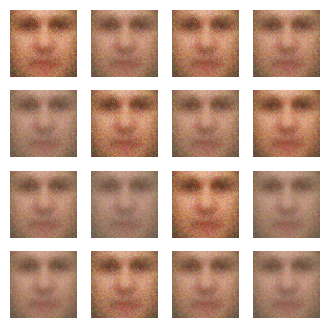

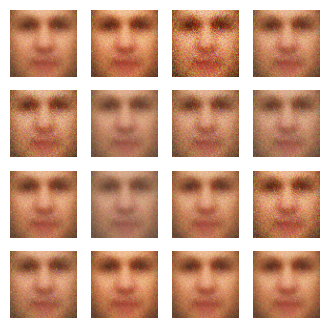

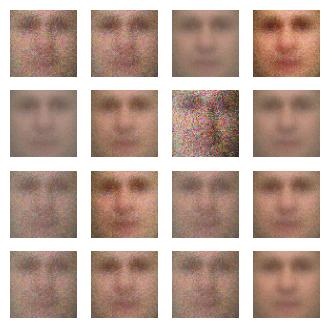

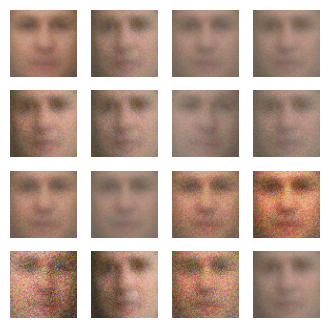

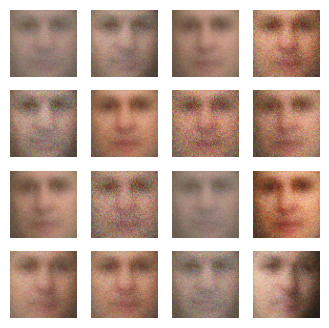

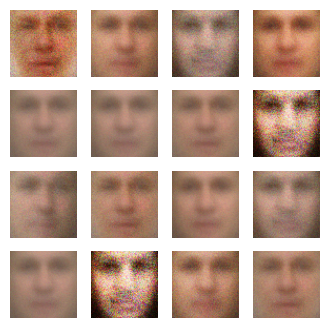

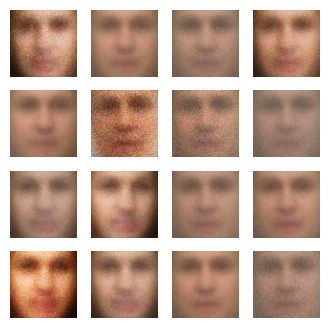

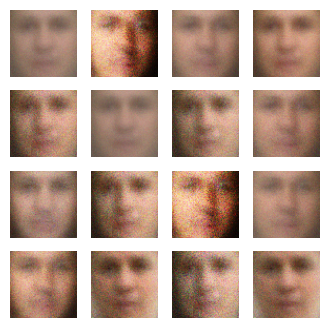

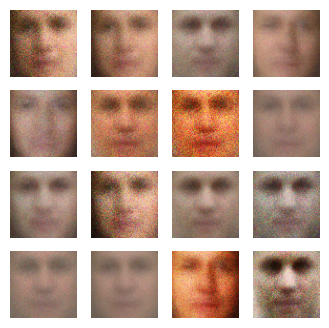

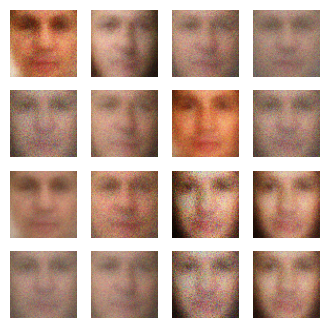

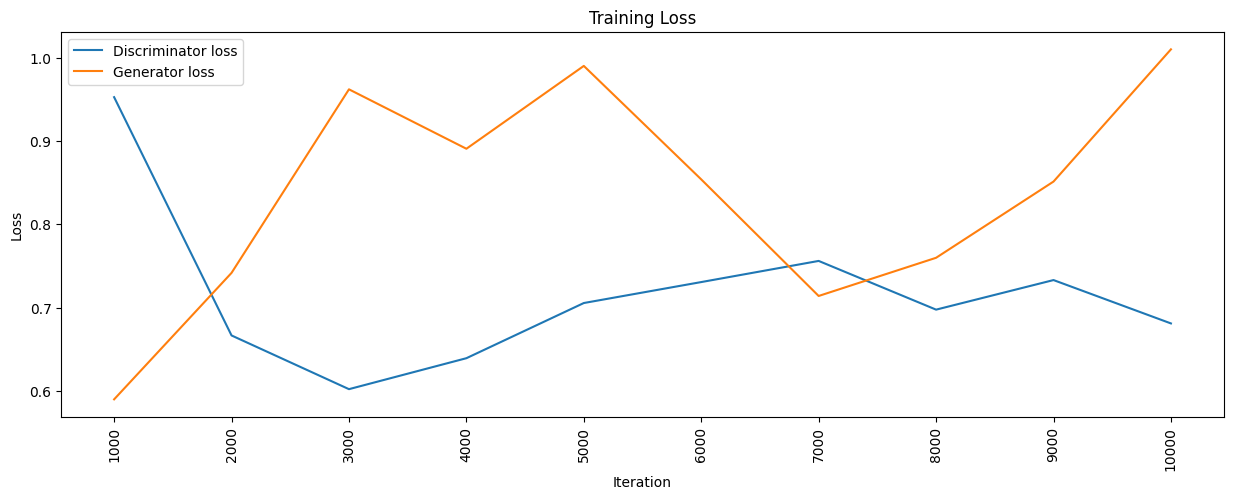

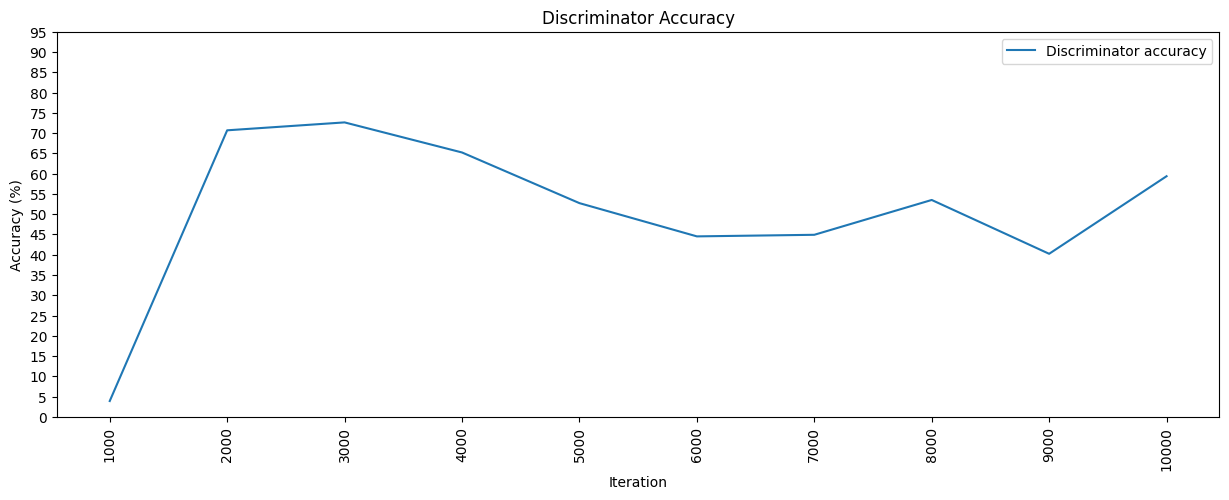

In [15]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):

    X_train = X_train2
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
